In [1]:
#Aman Jaiswal
#224104301
import cv2
import numpy as np
import math

In [2]:
face_type=['centerlight','glasses','happy','leftlight','noglasses','normal','rightlight','sad','surprised','wink']

In [3]:
image_folder= 'faces/faces/'
# Load the training images
X_train = []
for i in range(1, 16):
    for j in face_type:
        filename = image_folder+f"subject{i:02d}.{j}.jpg"
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        #print(img)
        img_resized = cv2.resize(img, (125, 125))
        #print(i,j)
        X_train.append(img_resized.astype(np.float32))
X_train = np.array(X_train)

# Load the test images
X_test = []
for i in range(1, 16):
    filename = image_folder+f"subject{i:02d}.sleepy.jpg"
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (125, 125))
    X_test.append(img_resized.astype(np.float32))
X_test = np.array(X_test)

In [4]:
X_train_n=X_train
X_test_n=X_test

Taking K =  10


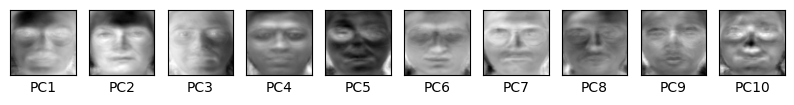

Predicting first 5 subject: 


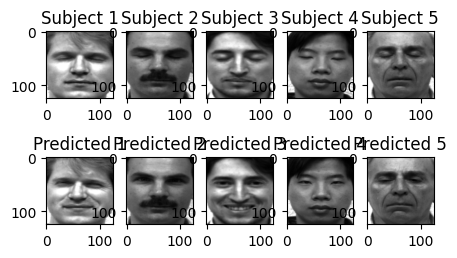

Taking K =  20


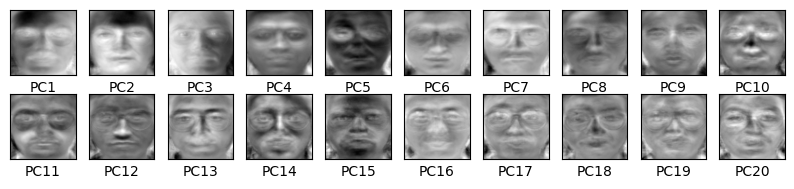

Predicting first 5 subject: 


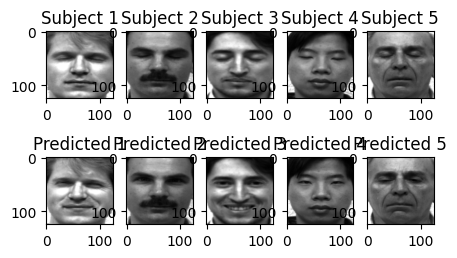

Taking K =  30


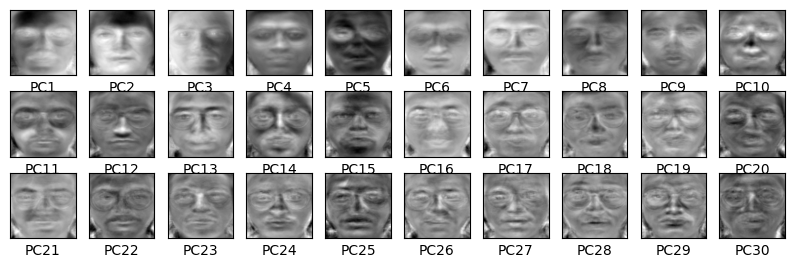

Predicting first 5 subject: 


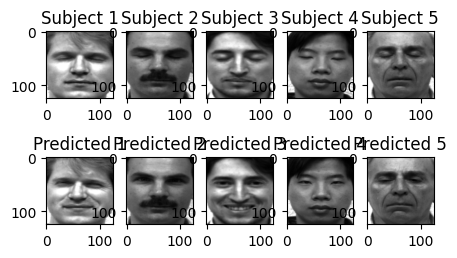

Taking K =  40


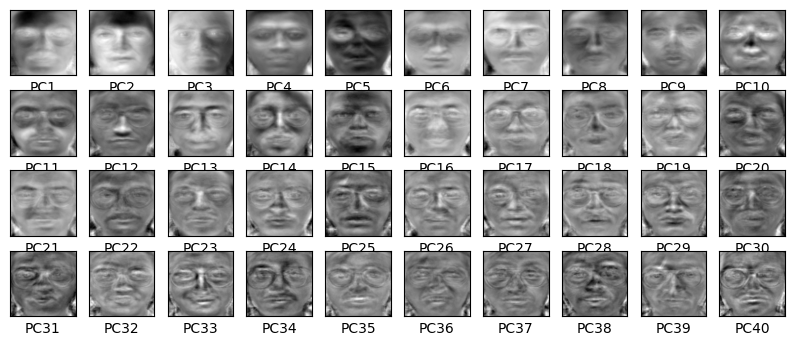

Predicting first 5 subject: 


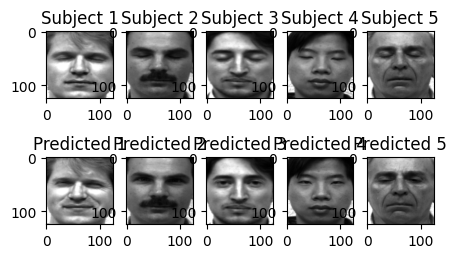

Taking K =  50


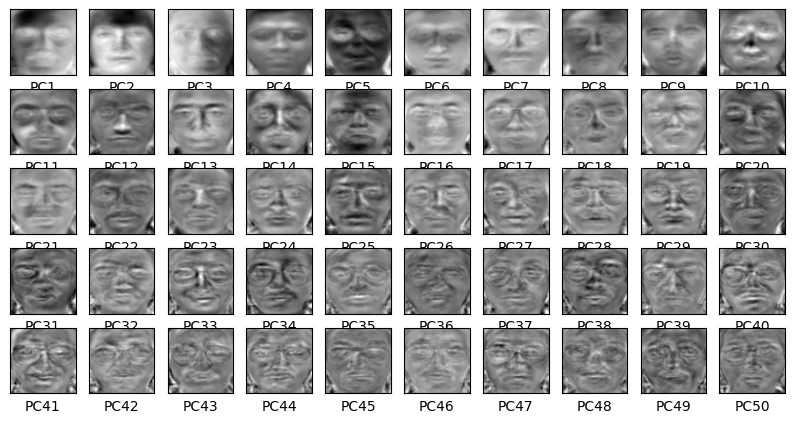

Predicting first 5 subject: 


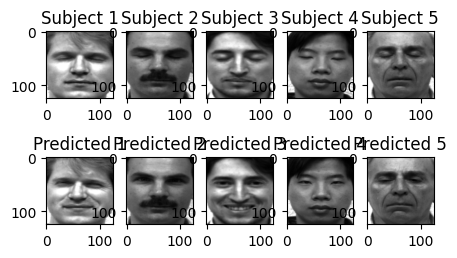

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reshaping the training and test sets
x_train = X_train_n.reshape(150, -1)
x_test = X_test_n.reshape(15, -1)


K = 100 # Number of components to keep
# Experiment with different values of K
for K in [10, 20, 30, 40, 50]:
  print('Taking K = ', K)
  # Perform PCA on the training set
  pca = PCA(n_components=K)
  pca.fit(x_train)
  eigenfaces = pca.components_
  # Visualize the K eigenfaces
  x=int(K/10)
  fig, axes = plt.subplots(x, 10, figsize=(10, x))
  for i, ax in enumerate(axes.flat):
      ax.imshow(eigenfaces[i].reshape(125, 125), cmap='gray')
      ax.set(xticks=[], yticks=[], xlabel=f"PC{i+1}")
  plt.show()

  # Compute the mean face image
  mean_face = np.mean(x_train, axis=0)

  # Subtract the mean face from each image
  X_train_centered = x_train - mean_face
  X_test_centered = x_test - mean_face

  # Project the data onto the K eigenfaces
  X_train_proj = pca.transform(X_train_centered)
  X_test_proj = pca.transform(X_test_centered)


  # Recognize test images by finding the closest match in the training set
  y_true = np.arange(15)
  y_pred = np.zeros(15)
  for i in range(15):
      distances = np.linalg.norm(X_test_proj[i] - X_train_proj, axis=1)
      y_pred[i] = np.argmin(distances)

  # Display the true and predicted faces
  print('Predicting first 5 subject: ')
  fig, axes = plt.subplots(2, 5, figsize=(5, 3))
  for i, ax in enumerate(axes.flat):
      if i < 5:
          ax.imshow(X_test[i].reshape(125, 125), cmap='gray')
          ax.set(title=f"Subject {i+1}")
      elif i < 10:
          ax.imshow(x_train[int(y_pred[i-5])].reshape(125, 125), cmap='gray')
          ax.set(title=f"Predicted {(i-4)}")
  plt.show()
